In [1]:
import pandas as pd
import glob
pd.options.mode.chained_assignment = None 

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Haarsteeg level
path5 = "../data/waterschap-aa-en-maas_sewage_2019/sewer_data/data_pump/rg8170_N99"
#Haarsteeg flow
path6 = "../data/waterschap-aa-en-maas_sewage_2019/sewer_data/data_pump/rg8170_99"

## Flow

In [3]:
df_flow = pd.concat([pd.read_csv(file) for file in glob.glob(path6 + "/*.csv")], ignore_index = True)
df_flow['TimeStamp'] = pd.to_datetime(df_flow['datumBeginMeting'])

df_flow['Year'] = df_flow['TimeStamp'].dt.year
df_flow['Month'] = df_flow['TimeStamp'].dt.month_name()
df_flow['Day'] = df_flow['TimeStamp'].dt.day

In [4]:
flow_18 = df_flow[df_flow['Year'] == 2018]
flow_19 = df_flow[df_flow['Year'] == 2019]

months18 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
            'September', 'October', 'November', 'December']
months19 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']

In [5]:
def Barplots(months, df):
    plt.rcParams['figure.figsize'] = 6,30
    fig, ax = plt.subplots(len(months),1);
    fig.subplots_adjust(hspace=0.8, wspace=0.4)
    for i, month in enumerate(months):
        group = df[df['Month'] == month].groupby('Day')['hstWaarde'].mean()
        ax[i].bar(np.arange(1,len(group)+1), list(group))
        ax[i].set_title(month + ' flow')
        ax[i].set_xlabel('Day of the month')
        ax[i].set_ylabel('Daily average flow in m³')

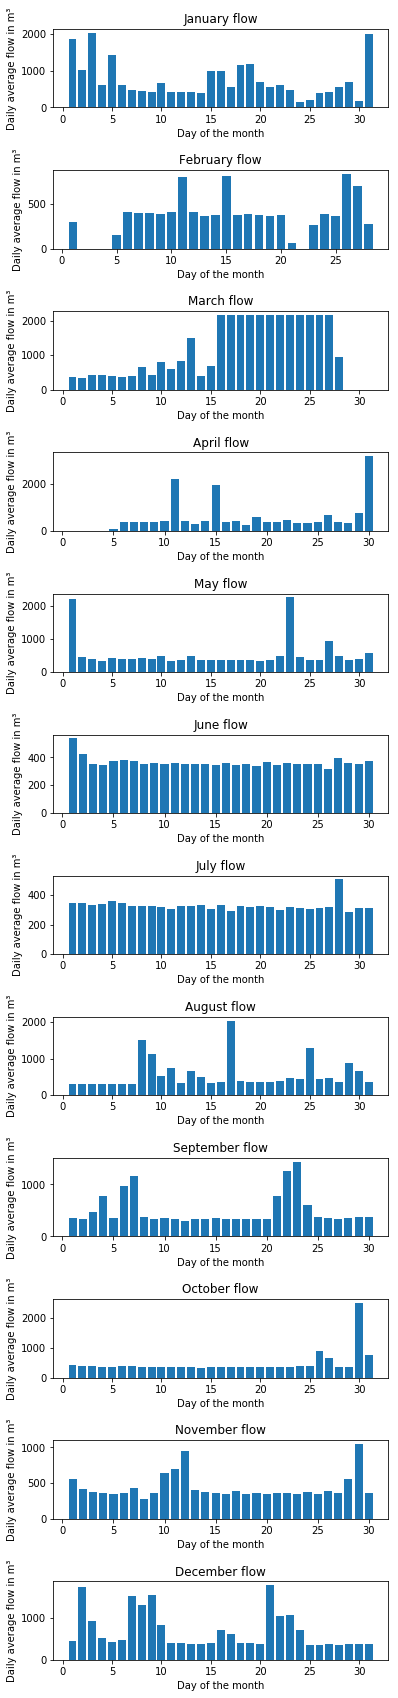

In [6]:
Barplots(months18, flow_18)

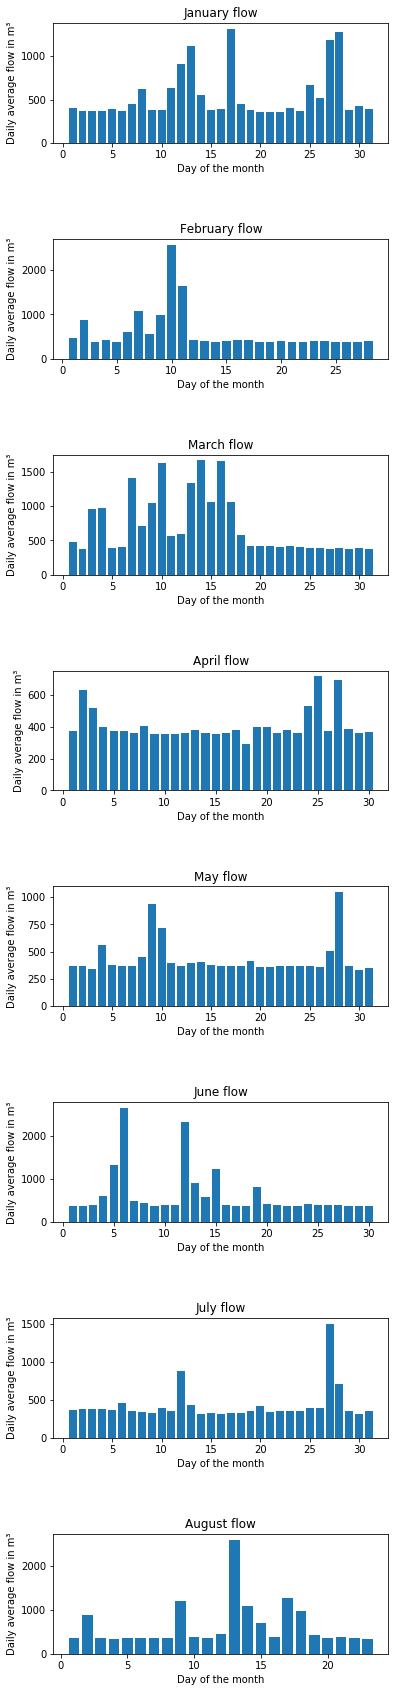

In [7]:
Barplots(months19, flow_19)

## Using Roger's pickle file
## Flow with rain, Haarsteeg & Bokhoven

In [8]:
combined_rain_pump_hour = pd.read_pickle("../data/combined_data/combined_rain_pump_1hour.pickle")
combined_rain_pump_hour.head()

,Haarsteeg,Bokhoven,RG8180_flow,RG8180_level,RG8170_flow,RG8170_level
datumBeginMeting,,,,,,
2017-12-31 23:00:00,0.0000,0.0000,NaN,NaN,NaN,NaN
2018-01-01 00:00:00,0.0124,0.0583,1200.0,61.7,219439.2,-18.5
2018-01-01 01:00:00,0.2245,0.0448,940.0,22.6,201402.8,-50.8
2018-01-01 02:00:00,0.0563,0.1409,0.0,9.6,165302.9,-71.9
2018-01-01 03:00:00,0.0427,0.0714,280.0,3.7,143666.6,-76.4


In [9]:
# add year, month and day to the data
combined_rain_pump_hour['time'] = combined_rain_pump_hour.index
combined_rain_pump_hour['Year'] = combined_rain_pump_hour['time'].dt.year
combined_rain_pump_hour['Month'] = combined_rain_pump_hour['time'].dt.month_name()
combined_rain_pump_hour['Day'] = combined_rain_pump_hour['time'].dt.day

In [10]:
# select data from 2018, 2019
y18 = combined_rain_pump_hour[combined_rain_pump_hour['Year'] == 2018]
y19 = combined_rain_pump_hour[combined_rain_pump_hour['Year'] == 2019]

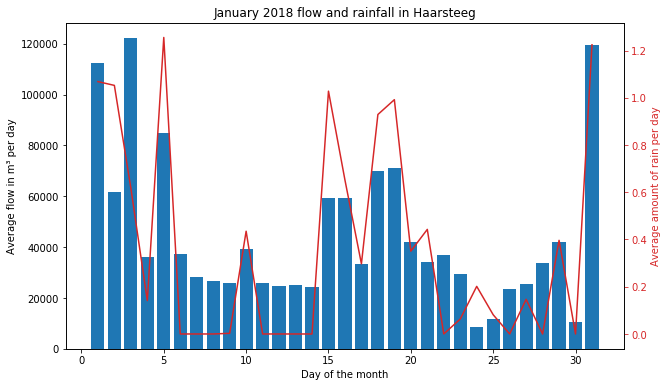

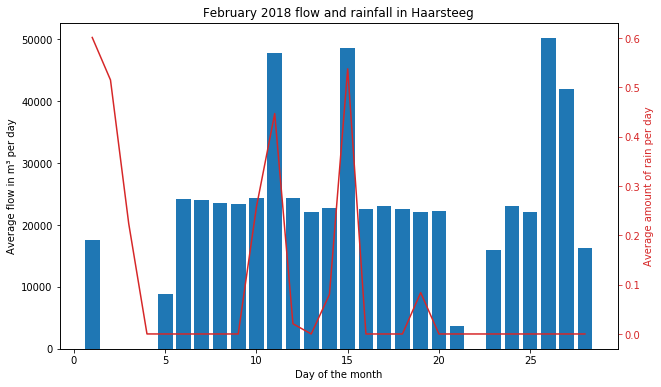

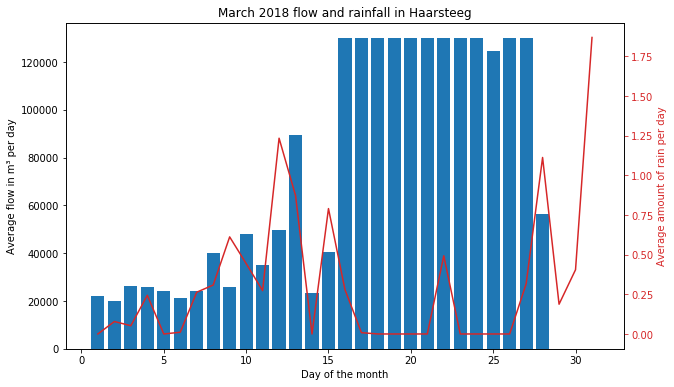

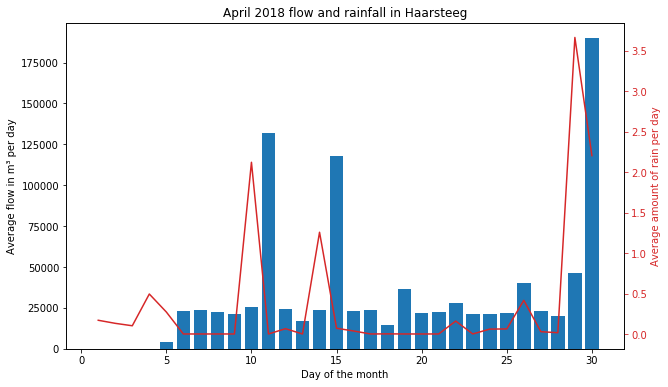

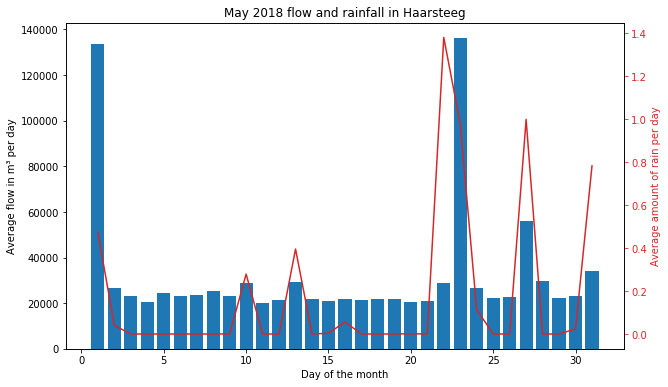

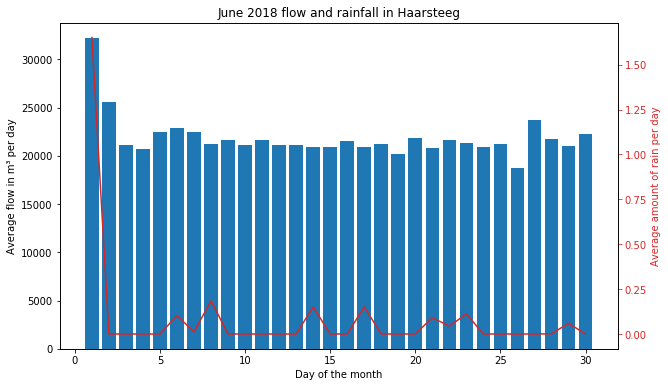

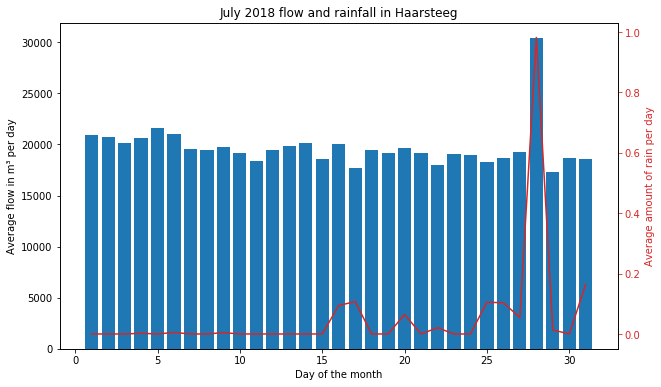

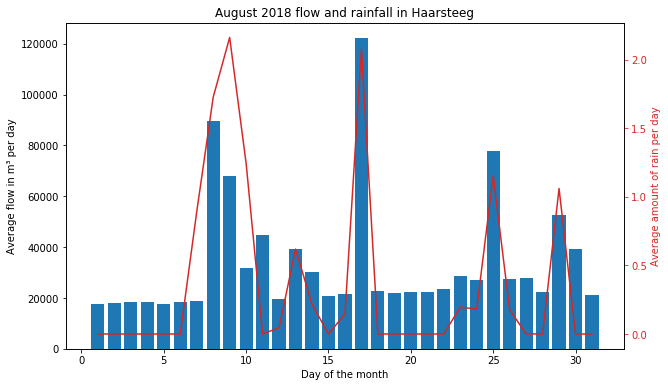

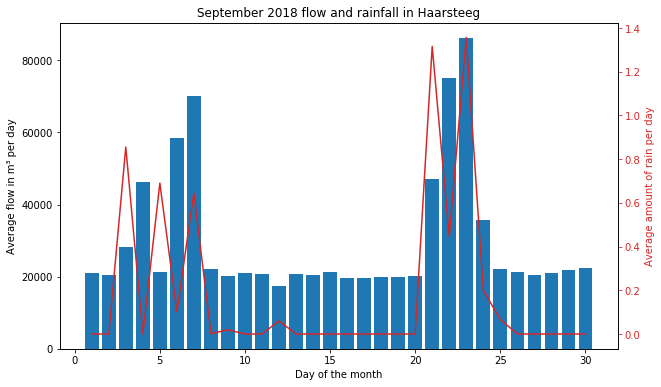

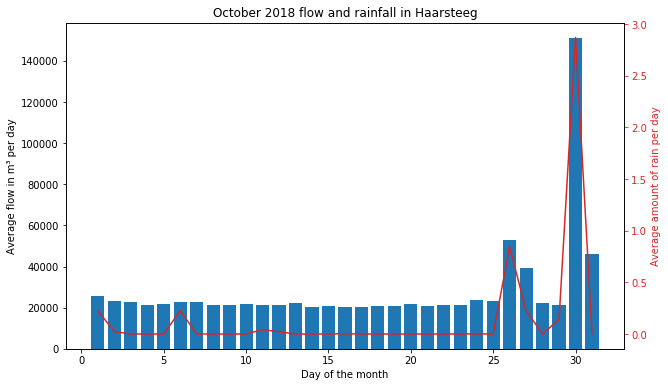

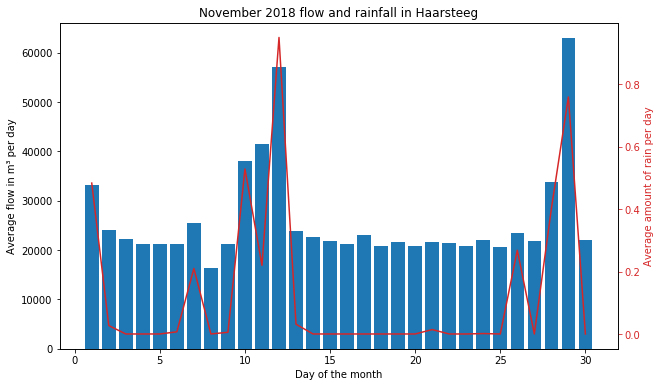

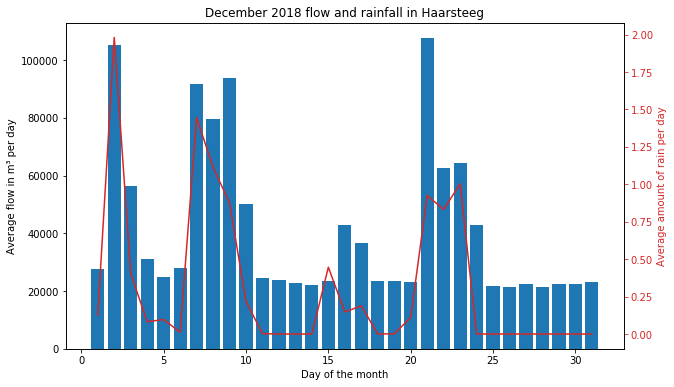

In [14]:
# visualize rain with flow 

plt.rcParams['figure.figsize'] = 10,6
#fig, ax = plt.subplots(12,1);
#fig.subplots_adjust(hspace=0.6, wspace=0.4)
#ax2=ax.twinx()

for i, month in enumerate(months18):
    group = y18[y18['Month'] == month].groupby('Day')[['RG8170_flow', 'RG8170_level', 'Haarsteeg']].mean()
    
    fig, ax = plt.subplots()
    
    ax.bar(np.arange(1, len(group)+1), group['RG8170_flow'])
    ax.set_title(month + ' 2018 flow and rainfall in Haarsteeg')
    ax.set_xlabel('Day of the month')
    ax.set_ylabel('Average flow in m³ per day')
    
    ax2 = ax.twinx()
    color = 'tab:red'
    ax2.plot(np.arange(1, len(group)+1), group['Haarsteeg'], color=color);
    ax2.set_ylabel('Average amount of rain per day', color=color);
    ax2.tick_params(colors=color)

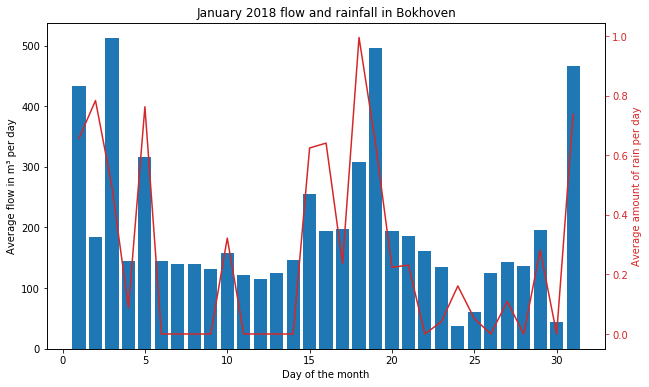

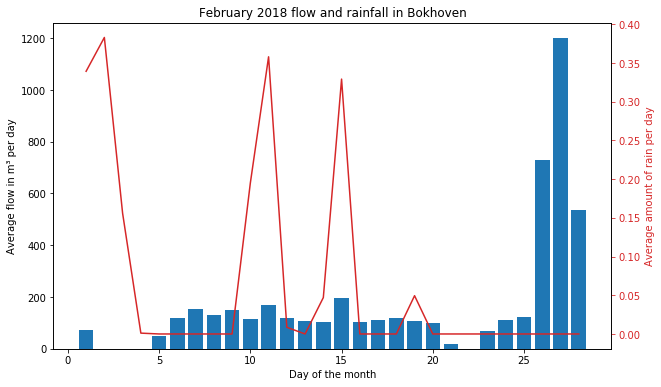

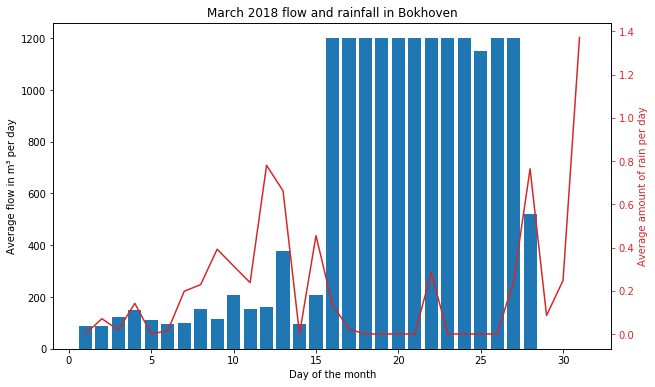

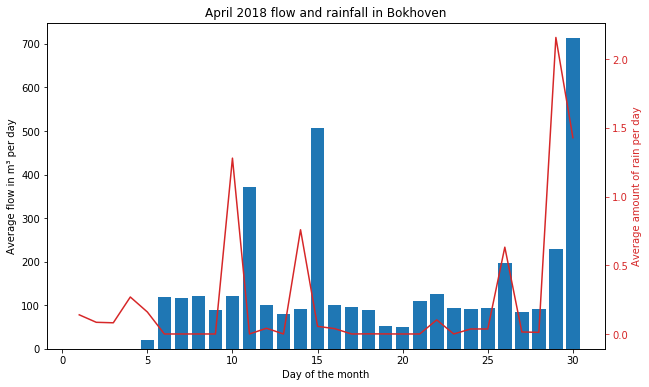

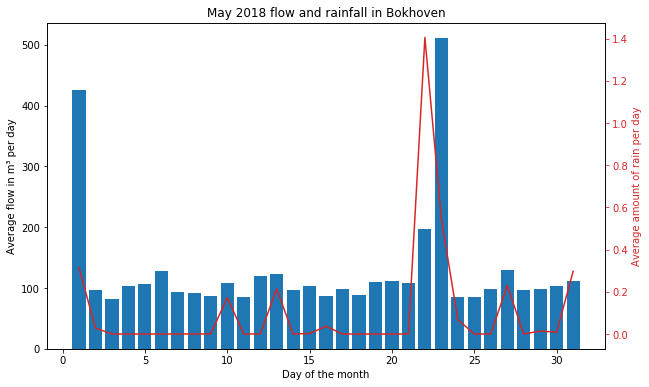

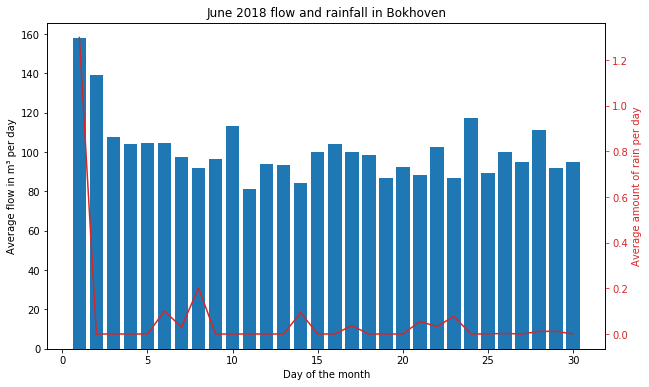

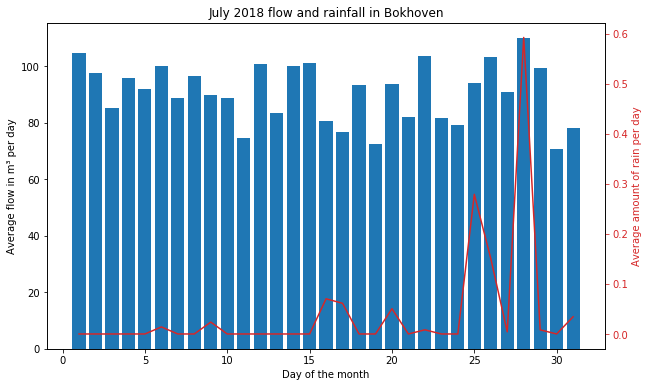

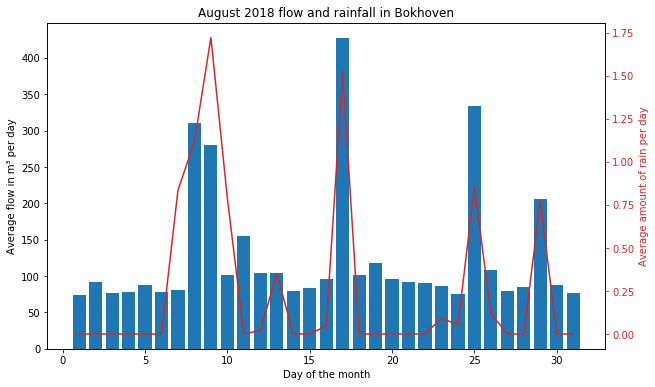

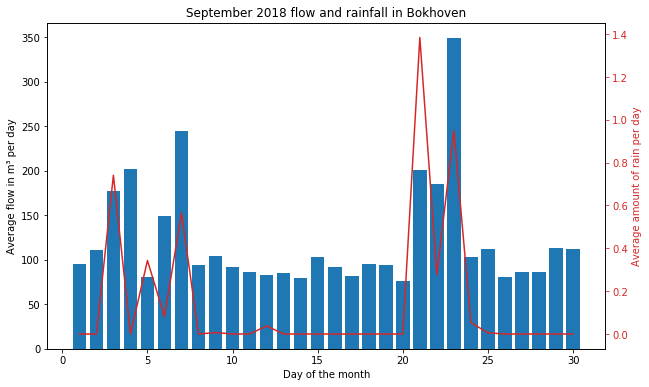

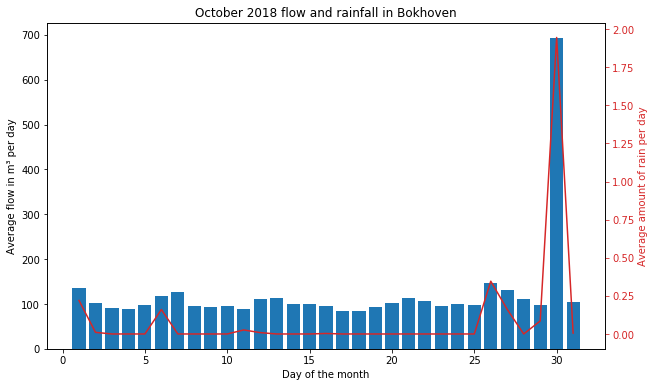

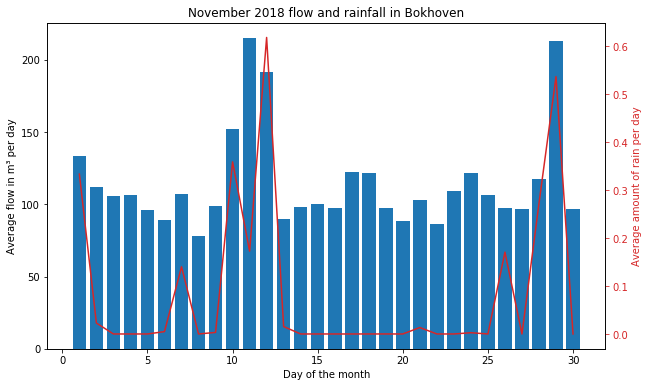

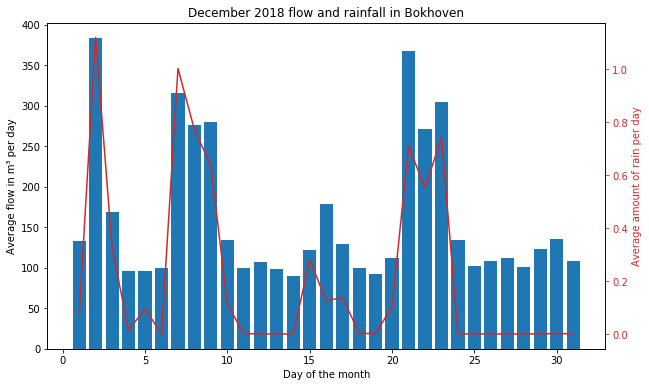

In [15]:
plt.rcParams['figure.figsize'] = 10,6

for i, month in enumerate(months18):
    group = y18[y18['Month'] == month].groupby('Day')[['RG8180_flow', 'RG8180_level', 'Bokhoven']].mean()
    
    fig, ax = plt.subplots()
    
    ax.bar(np.arange(1, len(group)+1), group['RG8180_flow'])
    ax.set_title(month + ' 2018 flow and rainfall in Bokhoven')
    ax.set_xlabel('Day of the month')
    ax.set_ylabel('Average flow in m³ per day')
    
    ax2 = ax.twinx()
    color = 'tab:red'
    ax2.plot(np.arange(1, len(group)+1), group['Bokhoven'], color=color);
    ax2.set_ylabel('Average amount of rain per day', color=color);
    ax2.tick_params(colors=color);